
# PROJECT - OFFICE SUPPLIER - LEADS FEEDBACK

Context: 

An office supply store tests a telemarketing campaign to its existing business customers. The company targeted approximately 16,000 customers for the campaign.

Project objectives:

Profile the customers that responded to the campaign to make the company aware of who its typical customer is.
Develop models that will allow the company to use the results of the campaign to target future, similar campaigns.
Show the financial value of your models.                                                       

In [224]:
#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)
import seaborn as sns

In [225]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [226]:
df = pd.read_excel('C:\\Users\\bukasa_r\\Downloads\\Office Supply Campaign ResultS 7-23-19.xlsx')

In [227]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,NaN


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Customer Number                    16172 non-null  float64       
 1   Campaign Period Sales              16172 non-null  float64       
 2   Historical Sales Volume            16172 non-null  float64       
 3   Date of First Purchase             16172 non-null  datetime64[ns]
 4   Number of Prior Year Transactions  16172 non-null  float64       
 5   Do Not Direct Mail Solicit         16172 non-null  float64       
 6   Do Not Email                       16172 non-null  float64       
 7   Do Not Telemarket                  16172 non-null  float64       
 8   Repurchase Method                  16172 non-null  object        
 9   Last Transaction Channel           15730 non-null  object        
 10  Desk                              

In [229]:
df.describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket
count,1.617200e+04,16172.000000,1.617200e+04,16172.000000,16172.000000,16172.000000,16172.000000
mean,2.070406e+07,245.896967,6.716763e+05,14.483119,0.107841,0.211848,0.097638
std,1.898585e+07,720.317450,9.566271e+05,8.031293,0.310189,0.408630,0.296834
min,8.673400e+04,-566.500000,-1.643031e+05,1.000000,0.000000,0.000000,0.000000
25%,9.100472e+06,0.000000,1.900188e+05,8.000000,0.000000,0.000000,0.000000
50%,1.807196e+07,0.000000,3.965039e+05,16.000000,0.000000,0.000000,0.000000
75%,2.712137e+07,145.669048,7.876159e+05,20.000000,0.000000,0.000000,0.000000
max,1.672359e+08,8936.850000,3.441213e+07,313.000000,1.000000,1.000000,1.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Customer Number                    16172 non-null  float64       
 1   Campaign Period Sales              16172 non-null  float64       
 2   Historical Sales Volume            16172 non-null  float64       
 3   Date of First Purchase             16172 non-null  datetime64[ns]
 4   Number of Prior Year Transactions  16172 non-null  float64       
 5   Do Not Direct Mail Solicit         16172 non-null  float64       
 6   Do Not Email                       16172 non-null  float64       
 7   Do Not Telemarket                  16172 non-null  float64       
 8   Repurchase Method                  16172 non-null  object        
 9   Last Transaction Channel           15730 non-null  object        
 10  Desk                              

In [231]:
df.isnull().sum()

Customer Number                         1
Campaign Period Sales                   1
Historical Sales Volume                 1
Date of First Purchase                  1
Number of Prior Year Transactions       1
Do Not Direct Mail Solicit              1
Do Not Email                            1
Do Not Telemarket                       1
Repurchase Method                       1
Last Transaction Channel              443
Desk                                    0
Executive Chair                         2
Standard Chair                          2
Monitor                                 2
Printer                                 2
Computer                                1
Insurance                               3
Toner                                   3
Office Supplies                         1
Number of Employees                     3
Language                             4472
dtype: int64

In [232]:
# Explore and clean data for EDA
df['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [233]:
df['Last Transaction Channel'].fillna('UNKNOWN', inplace=True)

In [234]:
df['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
UNKNOWN            443
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [235]:
df['Language'].value_counts()

English       11317
Spanish          88
Italian          46
Portuguese       41
Hindi            40
Chinese          34
Russian          24
Hebrew           20
Arabic           18
Greek            15
German           15
Japanese         11
Polish           10
Vietnamese        9
French            6
Korean            4
Thai              2
Pashto            1
Name: Language, dtype: int64

In [236]:
#Too many features to dummy - make binary - English and none since data derived from English prominent country
df.loc[df['Language'] != 'English', ['Language']] = 'non-English'

In [237]:
df['Language'].fillna('Unknown', inplace=True)
df['Language'].value_counts()

English        11317
non-English     4856
Name: Language, dtype: int64

In [238]:
#Few features with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Customer Number                    16172 non-null  float64       
 1   Campaign Period Sales              16172 non-null  float64       
 2   Historical Sales Volume            16172 non-null  float64       
 3   Date of First Purchase             16172 non-null  datetime64[ns]
 4   Number of Prior Year Transactions  16172 non-null  float64       
 5   Do Not Direct Mail Solicit         16172 non-null  float64       
 6   Do Not Email                       16172 non-null  float64       
 7   Do Not Telemarket                  16172 non-null  float64       
 8   Repurchase Method                  16172 non-null  object        
 9   Last Transaction Channel           16173 non-null  object        
 10  Desk                              

In [239]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16171
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Customer Number                    16168 non-null  float64       
 1   Campaign Period Sales              16168 non-null  float64       
 2   Historical Sales Volume            16168 non-null  float64       
 3   Date of First Purchase             16168 non-null  datetime64[ns]
 4   Number of Prior Year Transactions  16168 non-null  float64       
 5   Do Not Direct Mail Solicit         16168 non-null  float64       
 6   Do Not Email                       16168 non-null  float64       
 7   Do Not Telemarket                  16168 non-null  float64       
 8   Repurchase Method                  16168 non-null  object        
 9   Last Transaction Channel           16168 non-null  object        
 10  Desk                              

In [240]:
#Engineer feature - measure days between first purchase to current time
now = datetime.datetime.now()
df['Since_First_Purchase'] = now - df['Date of First Purchase']
df['Days_in_Contact'] = df['Since_First_Purchase'].dt.days

In [241]:
import datetime
df['length_of_membership'] = datetime.datetime.now().year - df['Date of First Purchase'].dt.year

In [242]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,18870 days 14:14:54.241963,18870,52
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,14230 days 14:14:54.241963,14230,39
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,21031 days 14:14:54.241963,21031,58
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,13514 days 14:14:54.241963,13514,37
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,non-English,12009 days 14:14:54.241963,12009,33


In [243]:
#engineer feature to calculate avg purchase price
df['Avg_Annual_Hist_Sales'] = df['Historical Sales Volume'] / df['Number of Prior Year Transactions']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A814BA8548>,
      dtype=object)

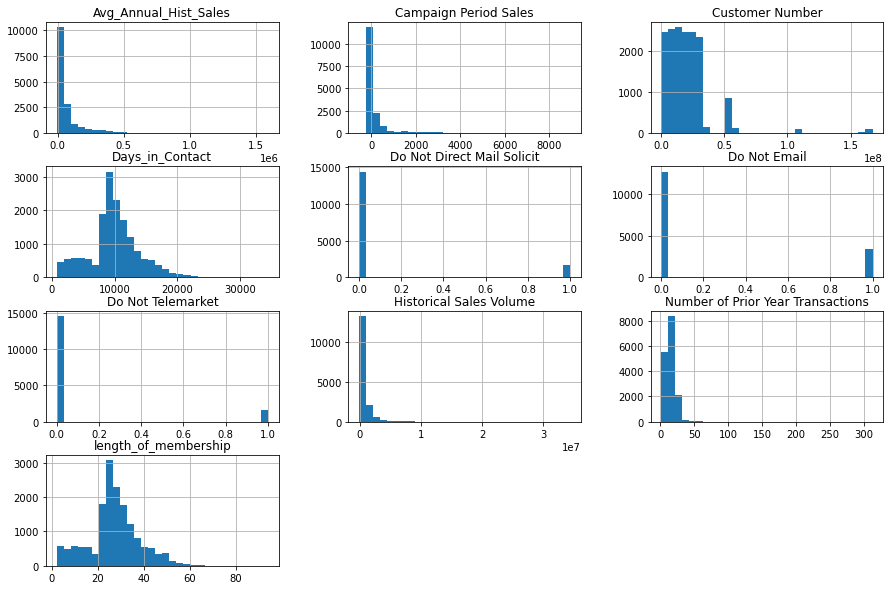

In [244]:
df.hist(bins=30, figsize=(15, 10))

In [245]:
#Standardize wide 
df['History_log'] = np.log(df['Historical Sales Volume'])

In [246]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,18870 days 14:14:54.241963,18870,52,9786.895238,11.896850
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,14230 days 14:14:54.241963,14230,39,19999.280000,12.994494
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,21031 days 14:14:54.241963,21031,58,51077.142857,13.785531
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,13514 days 14:14:54.241963,13514,37,13540.800000,12.346676
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,non-English,12009 days 14:14:54.241963,12009,33,1304.920635,10.218420


In [247]:
#Create feature to dentify whether customer purchased or not
df['Made_purchase'] = np.where(df['Campaign Period Sales'] > 0, 1, 0)

In [248]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,18870 days 14:14:54.241963,18870,52,9786.895238,11.896850,1
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,14230 days 14:14:54.241963,14230,39,19999.280000,12.994494,1
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,21031 days 14:14:54.241963,21031,58,51077.142857,13.785531,1
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,13514 days 14:14:54.241963,13514,37,13540.800000,12.346676,0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,non-English,12009 days 14:14:54.241963,12009,33,1304.920635,10.218420,1


In [249]:
#Group Customer employee count to groups for dummying
df['Number of Employees'].value_counts().index

Index(['6-10', ' ', '1-5', '11-50', '51-100', '101-500', '500+'], dtype='object')

In [250]:
#Avg all counts
df['Number of Employees'] = df['Number of Employees'].map({'6-10': 8, ' ': 0, '1-5': 3, '11-50': 30, '51-100': 75,'101-500': 300, '500+': 500})

In [251]:
office_furn = df[['Desk', 'Executive Chair', 'Standard Chair', 'Office Supplies']]

In [252]:
electronic = df[['Monitor', 'Printer', 'Computer', 'Toner', ]]

In [253]:
def y_no_to_binary(x):
    if x == 'Y':
        return 1
    else:
        return 0

In [254]:
y_no_convert = ['Desk', 'Computer', 'Insurance', 'Toner']
df.loc[:, y_no_convert] = df[y_no_convert].replace({'YY': 'Y'})

In [255]:
for col in office_furn:
    df[col] = df[col].apply(y_no_to_binary)

In [256]:
for col in electronic:
    df[col] = df[col].apply(y_no_to_binary)

In [257]:
df.loc[df['Insurance'] == 'Y', ['Insurance']] = 1

In [258]:
df.loc[df['Insurance'] == 'N', ['Insurance']] = 0

In [259]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,8,English,18870 days 14:14:54.241963,18870,52,9786.895238,11.896850,1
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30,English,14230 days 14:14:54.241963,14230,39,19999.280000,12.994494,1
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,8,English,21031 days 14:14:54.241963,21031,58,51077.142857,13.785531,1
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3,English,13514 days 14:14:54.241963,13514,37,13540.800000,12.346676,0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,0,non-English,12009 days 14:14:54.241963,12009,33,1304.920635,10.218420,1


In [260]:
#feature engineer grouping group products
df['Furniture'] = np.where(df['Desk'] + df['Executive Chair']+ df['Standard Chair'] >0,1,0)

In [261]:
df['Electronics'] = np.where(df['Monitor'] + df['Computer']+ df['Toner']+ + df['Printer'] >0,1,0)

In [262]:
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,8,English,18870 days 14:14:54.241963,18870,52,9786.895238,11.896850,1,0,0
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30,English,14230 days 14:14:54.241963,14230,39,19999.280000,12.994494,1,0,0
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,8,English,21031 days 14:14:54.241963,21031,58,51077.142857,13.785531,1,0,0
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3,English,13514 days 14:14:54.241963,13514,37,13540.800000,12.346676,0,0,0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,0,non-English,12009 days 14:14:54.241963,12009,33,1304.920635,10.218420,1,0,0


In [263]:
df_dtypes = df.dtypes =='object'

In [264]:
obj_cols = []
for i, feature in enumerate(df_dtypes):
    if feature:
        obj_cols.append(df_dtypes.index[i])

In [265]:
obj_cols

['Repurchase Method', 'Last Transaction Channel', 'Insurance', 'Language']

In [266]:
obj_df = df.loc[:, obj_cols]

In [267]:
obj_dummies = pd.get_dummies(obj_df, drop_first=True)

In [268]:
obj_dummies

,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Insurance_1,Language_non-English
0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16167,0,0,0,0,0,0,0,0,0,0,1,1
16168,1,0,0,0,0,0,1,0,0,0,0,1
16169,1,0,0,0,0,0,1,0,0,0,0,1
16170,1,0,0,0,0,0,1,0,0,0,0,1


In [269]:
cols_type = df.dtypes != 'object'
inds = cols_type.index
numeric_cols = []
for i, col in enumerate(cols_type):
    if col:
        numeric_cols.append(inds[i])

In [270]:
numeric_cols

['Customer Number',
 'Campaign Period Sales',
 'Historical Sales Volume',
 'Date of First Purchase',
 'Number of Prior Year Transactions',
 'Do Not Direct Mail Solicit',
 'Do Not Email',
 'Do Not Telemarket',
 'Desk',
 'Executive Chair',
 'Standard Chair',
 'Monitor',
 'Printer',
 'Computer',
 'Toner',
 'Office Supplies',
 'Number of Employees',
 'Since_First_Purchase',
 'Days_in_Contact',
 'length_of_membership',
 'Avg_Annual_Hist_Sales',
 'History_log',
 'Made_purchase',
 'Furniture',
 'Electronics']

In [271]:
clean_df = pd.concat([df[numeric_cols], obj_dummies], axis = 1, sort = False)

In [272]:
clean_df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Toner,Office Supplies,Number of Employees,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Insurance_1,Language_non-English
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,18870 days 14:14:54.241963,18870,52,9786.895238,11.896850,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,30,14230 days 14:14:54.241963,14230,39,19999.280000,12.994494,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,21031 days 14:14:54.241963,21031,58,51077.142857,13.785531,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,13514 days 14:14:54.241963,13514,37,13540.800000,12.346676,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,12009 days 14:14:54.241963,12009,33,1304.920635,10.218420,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1


In [273]:
clean_df.to_csv('C:\\Users\\bukasa_r\\Documents\\new stuff\\cleaned_office_supplies.csv')

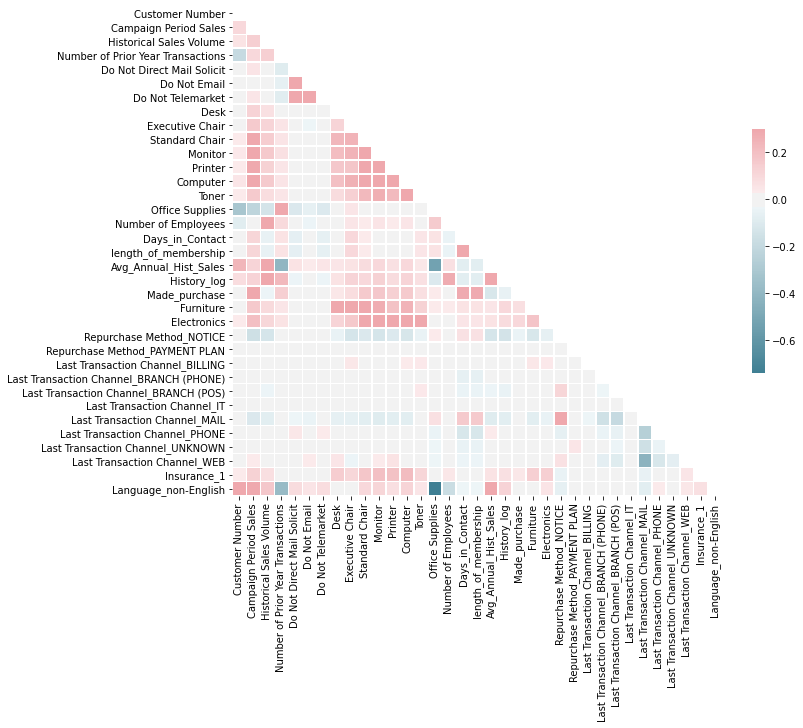

In [274]:
# Compute the correlation matrix
corr = clean_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [275]:
clean_df.loc[clean_df['Campaign Period Sales'] < 0] = 0
clean_df.loc[clean_df['Historical Sales Volume'] < 0] = 0
clean_df[['Campaign Period Sales', 'Historical Sales Volume', 'Number of Prior Year Transactions']].describe()

,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions
count,16168.000000,1.616800e+04,16168.000000
mean,245.840071,6.713209e+05,14.475878
std,719.999064,9.556780e+05,8.036521
min,0.000000,0.000000e+00,0.000000
25%,0.000000,1.900134e+05,8.000000
50%,0.000000,3.962959e+05,16.000000
75%,145.538667,7.871561e+05,20.000000
max,8936.850000,3.441213e+07,313.000000


In [276]:
clean_df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Toner,Office Supplies,Number of Employees,Since_First_Purchase,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Insurance_1,Language_non-English
0,86734.0,238.704762,146803.428571,1968-10-01 00:00:00,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,18870 days 14:14:54.241963,18870,52,9786.895238,11.896850,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,97098.0,281.680000,439984.160000,1981-06-15 00:00:00,22.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,30,14230 days 14:14:54.241963,14230,39,19999.280000,12.994494,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,100836.0,432.857143,970465.714286,1962-11-01 00:00:00,19.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,21031 days 14:14:54.241963,21031,58,51077.142857,13.785531,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,116390.0,0.000000,230193.600000,1983-06-01 00:00:00,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,13514 days 14:14:54.241963,13514,37,13540.800000,12.346676,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,127914.0,1370.166667,27403.333333,1987-07-15 00:00:00,21.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,12009 days 14:14:54.241963,12009,33,1304.920635,10.218420,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1


In [277]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [278]:
# predicts = clean_df.drop(['Customer Number',  'Campaign Period Sales', 'Made_purchase', 'Since_First_Purchase',
#                          'Date of First Purchase'],axis=1)

In [279]:
X = clean_df.drop(['Date of First Purchase', 'Since_First_Purchase'], axis=1)

In [280]:
y = clean_df['Made_purchase']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, stratify=y, random_state=43)

In [282]:
#For Categorical Model
X_train_nsales  = X_train.drop(['Campaign Period Sales','Made_purchase'], axis=1)
X_test_nsales = X_test.drop(['Campaign Period Sales','Made_purchase'], axis=1)

In [283]:
#For regression Model
y_train_regression = X_train['Campaign Period Sales']
y_test_regression = X_test['Campaign Period Sales']

In [284]:
X_train_regress  = X_train.drop('Campaign Period Sales', axis=1)
X_test_regress = X_test.drop('Campaign Period Sales', axis=1)

# Model Development

We will run through various classification & regressional model to find best fit

In [285]:
params = {'max_depth': [i for i in range (2,15)], 'min_samples_split': [i for i in range(4,10)]}


In [286]:
grid = GridSearchCV(RandomForestClassifier(n_estimators= 100), param_grid=params, cv=10)

In [287]:
grid.fit(X_train_nsales, y_train)
grid.best_params_

{'max_depth': 13, 'min_samples_split': 8}

In [288]:
grid.score(X_test_nsales,y_test)

0.8647946561108362

In [289]:
forest = RandomForestClassifier(n_estimators=100, max_depth=14, min_samples_split=7)
forest.fit(X_train_nsales, y_train)
forest.score(X_test_nsales, y_test)

0.8659079663532905

In [290]:
lr = LogisticRegression()
lr.fit(X_train_nsales,y_train)
lr.score(X_test_nsales, y_test)

0.7293419099455715

In [291]:
dtree = DecisionTreeClassifier(max_depth=8)
dtree.fit(X_train_nsales, y_train)
dtree.score(X_test_nsales, y_test)

0.8595992083127165

In [292]:
tree_res = pd.DataFrame({'feature': X_train_nsales.columns, 'importance': dtree.feature_importances_})
tree_res.sort_values('importance', ascending=False)

,feature,importance
15,Days_in_Contact,0.788649
9,Monitor,0.049700
17,Avg_Annual_Hist_Sales,0.045916
2,Number of Prior Year Transactions,0.044680
0,Customer Number,0.019741
14,Number of Employees,0.009578
10,Printer,0.004736
18,History_log,0.004730
19,Furniture,0.004676
1,Historical Sales Volume,0.004391


In [293]:
X_train['Probability'] = forest.predict_proba(X_train_nsales)[:,1]

In [294]:
X_test['Probability'] = forest.predict_proba(X_test_nsales)[:,1]

In [295]:
X_test

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Toner,Office Supplies,Number of Employees,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Insurance_1,Language_non-English,Probability
5238,11787214.0,114.773333,111904.000000,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,20574,56,7460.266667,11.625397,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.834377
6876,15397033.0,169.849333,276514.714667,11.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,3,15675,43,25137.701333,12.530019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.698252
9552,21315497.0,3671.833333,396558.000000,4.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,9343,26,99139.500000,12.890578,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.291963
14386,32562973.0,121.573333,84736.613333,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,9981,27,4984.506667,11.347303,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.653215
7984,17817079.0,0.000000,843261.760000,22.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,3,8995,25,38330.080000,13.645033,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.065091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,21802074.0,0.000000,279706.666667,10.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,8478,23,27970.666667,12.541497,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0.167623
6021,13503579.0,257.485714,710660.571429,20.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,9967,27,35533.028571,13.473950,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.570208
13369,30100368.0,0.000000,6100.114286,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,10760,30,2033.371429,8.716063,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.142268
11286,25177457.0,0.000000,28228.933333,19.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,11779,32,1485.733333,10.248103,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.352880


In [296]:
import scikitplot as skplt
predict_probas = forest.predict_proba(X_test_nsales)
predict = forest.predict(X_test_nsales)

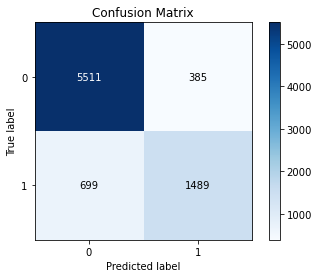

In [297]:
skplt.metrics.plot_confusion_matrix(y_test, predict)

In [319]:
from sklearn.metrics import classification_report
skplt.metrics.plot_confusion_matrix(y_test, predict)


 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      5896
           1       0.79      0.68      0.73      2188

    accuracy                           0.87      8084
   macro avg       0.84      0.81      0.82      8084
weighted avg       0.86      0.87      0.86      8084



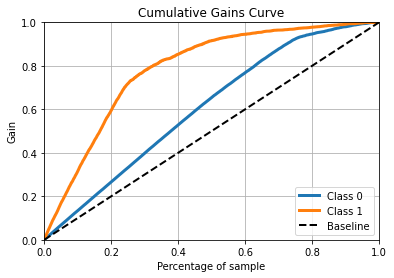

In [298]:
skplt.metrics.plot_cumulative_gain(y_test, predict_probas)

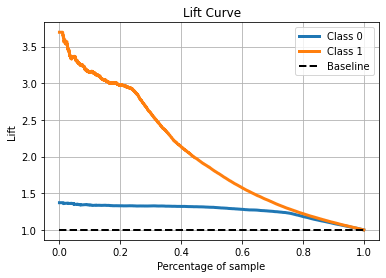

In [299]:
# model better at predicting non buyers than buyers
skplt.metrics.plot_lift_curve(y_test, predict_probas)
plt.legend(loc = 'upper right')

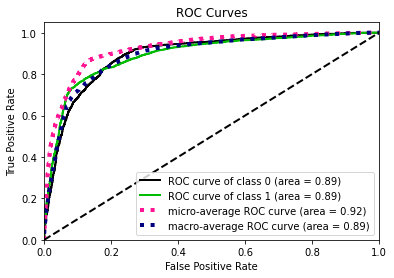

In [300]:
skplt.metrics.plot_roc_curve(y_test, predict_probas)

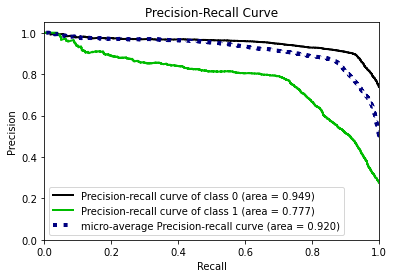

In [301]:
skplt.metrics.plot_precision_recall_curve(y_test, predict_probas)

In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [303]:
X_train_nsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 4646 to 14160
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Customer Number                          8084 non-null   float64
 1   Historical Sales Volume                  8084 non-null   float64
 2   Number of Prior Year Transactions        8084 non-null   float64
 3   Do Not Direct Mail Solicit               8084 non-null   float64
 4   Do Not Email                             8084 non-null   float64
 5   Do Not Telemarket                        8084 non-null   float64
 6   Desk                                     8084 non-null   int64  
 7   Executive Chair                          8084 non-null   int64  
 8   Standard Chair                           8084 non-null   int64  
 9   Monitor                                  8084 non-null   int64  
 10  Printer                                  808

In [304]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train_regress, y_train_regression)
dtree.score(X_test_regress, y_test_regression)

0.7928089806536239

In [305]:
tree_res = pd.DataFrame({'feature': X_train_regress.columns, 'importance': dtree.feature_importances_})
tree_res.sort_values('importance', ascending=False).head(20)

,feature,importance
14,Number of Employees,0.469267
19,Made_purchase,0.311506
17,Avg_Annual_Hist_Sales,0.067132
2,Number of Prior Year Transactions,0.062843
15,Days_in_Contact,0.018502
0,Customer Number,0.014346
16,length_of_membership,0.012401
1,Historical Sales Volume,0.010010
22,Repurchase Method_NOTICE,0.009334
20,Furniture,0.006330


In [306]:
grid = GridSearchCV(RandomForestRegressor(n_estimators= 100), param_grid=params, cv=10)

In [307]:
forest = RandomForestRegressor(random_state=42,n_estimators=100)
forest.fit(X_train_regress, y_train_regression)
forest.score(X_test_regress, y_test_regression)

0.8752892657749576

In [308]:
# The differing scales of the raw data may impact these algorithms. 
# Part of a requirement for a standardised data set is to have each attribute have a mean value of zero 
# and a standard deviation of 1. I implement standardisation using pipelines. 
# Cross-validation to validate performance of algorithms in totality.

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train_regress, y_train_regression, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -248688.862179 (44213.922746)
ScaledLASSO: -248475.771013 (44079.382808)
ScaledEN: -268812.702054 (52685.020150)
ScaledKNN: -240980.742861 (34378.570938)
ScaledCART: -93450.752264 (34049.827022)
ScaledGBM: -60184.298000 (11344.351406)
ScaledRFR: -58258.519118 (15000.863965)


In [309]:
# From the output above, it looks like the RandomForestRegressor operforms the best using a scaled version of the data. 
# From this point onward, I will build the regression algorithm using the RandomForestRegressor. 
# The RandomForestRegressor will be tested with a few n_estimators using the GridSearchCV function.

from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train_regress)
rescaledX = scaler.transform(X_train_regress)
param_grid = dict(n_estimators=np.array([50,100,200,300,400,1000]))
model = RandomForestRegressor(random_state=42)
kfold = KFold(n_splits=10, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train_regression)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-59655.045116 (15959.322781) with: {'n_estimators': 50}
-59055.745293 (15286.149493) with: {'n_estimators': 100}
-59100.974439 (14778.290316) with: {'n_estimators': 200}
-59019.808821 (14742.510527) with: {'n_estimators': 300}
-58817.460090 (14641.122599) with: {'n_estimators': 400}
-58533.813274 (14714.515885) with: {'n_estimators': 1000}
Best: -58533.813274 using {'n_estimators': 1000}


In [310]:
# The best n_estimator configuration is 1000 with the negative mean square error closest to 0.

# Finalise and validate model
# There's a need to standardise the training and test data before putting them through the GBR model.

from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train_regress)
rescaled_X_train = scaler.transform(X_train_regress)
model = GradientBoostingRegressor(random_state=42, n_estimators=1000)
model.fit(rescaled_X_train, y_train_regression)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test_regress)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test_regression, predictions))

71214.27303157591


In [311]:
# the GBR performed well. Important to note that the mean_square_error is calculated using the scaled data. 
# It does not represent the error between the actual house prices and predicted prices. 
# To better appreciate the outcome of the predictions, I look at the raw predicted values and the corresponding test data.

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test_regression})
compare.head()

,Prediction,Test Data
5238,127.557969,114.773333
6876,242.826064,169.849333
9552,1983.231855,3671.833333
14386,230.872918,121.573333
7984,0.530124,0.000000


In [312]:
model.score(rescaled_X_test ,y_test_regression)

0.8624850789210652

In [313]:
X_test['Pred_Sale'] = predictions

In [314]:
X_test.head(10)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Toner,Office Supplies,Number of Employees,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Insurance_1,Language_non-English,Probability,Pred_Sale
5238,11787214.0,114.773333,111904.000000,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,20574,56,7460.266667,11.625397,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.834377,127.557969
6876,15397033.0,169.849333,276514.714667,11.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,3,15675,43,25137.701333,12.530019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.698252,242.826064
9552,21315497.0,3671.833333,396558.000000,4.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,9343,26,99139.500000,12.890578,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.291963,1983.231855
14386,32562973.0,121.573333,84736.613333,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,9981,27,4984.506667,11.347303,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.653215,230.872918
7984,17817079.0,0.000000,843261.760000,22.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,3,8995,25,38330.080000,13.645033,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.065091,0.530124
9252,20641634.0,0.000000,652048.948571,19.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,8,11049,30,34318.365714,13.387875,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.091071,-2.287252
3281,7450815.0,0.000000,206921.074286,19.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,8,6096,17,10890.582857,12.240093,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.202956,-8.689018
4821,10882675.0,217.609600,115550.697600,9.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,3,15053,41,12838.966400,11.657465,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.856681,234.097575
7794,17326594.0,0.000000,157205.428571,15.0,1.0,0.0,1.0,0,0,0,0,0,0,0,1,8,8537,23,10480.361905,11.965309,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.078582,-4.883422
4413,9946468.0,0.000000,137543.466667,7.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,30,10333,28,19649.066667,11.831695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.279028,1.624667


In [315]:
#E(profit) = 0.22 * prob_sale * est_transaction_size - 8.40 * proba_sale - 45.65
X_test['Profit'] = 0.22 * X_test['Probability'] * X_test['Pred_Sale'] - 8.40 * X_test['Probability'] - 45.65

In [316]:
X_test.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Toner,Office Supplies,Number of Employees,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Insurance_1,Language_non-English,Probability,Pred_Sale,Profit
5238,11787214.0,114.773333,1.119040e+05,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,20574,56,7460.266667,11.625397,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.834377,127.557969,-29.243859
6876,15397033.0,169.849333,2.765147e+05,11.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,3,15675,43,25137.701333,12.530019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.698252,242.826064,-14.213499
9552,21315497.0,3671.833333,3.965580e+05,4.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,9343,26,99139.500000,12.890578,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.291963,1983.231855,79.284390
14386,32562973.0,121.573333,8.473661e+04,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,9981,27,4984.506667,11.347303,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.653215,230.872918,-17.958903
7984,17817079.0,0.000000,8.432618e+05,22.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,3,8995,25,38330.080000,13.645033,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.065091,0.530124,-46.189174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10263,22936867.0,0.000000,5.127417e+05,10.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,2670,7,51274.166667,13.147527,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0.182965,10.187948,-46.776820
6898,15439420.0,0.000000,1.046753e+05,7.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,10988,30,14953.615238,11.558619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.034782,8.025356,-45.880756
1239,3081989.0,272.504762,1.798531e+05,20.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,4147,11,8992.657143,12.099896,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.254659,293.791005,-31.329507
5864,13129933.0,0.000000,2.185690e+05,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,13118,36,218569.000000,12.294857,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0.036446,12.652179,-45.854699


In [317]:
X_test['Decile'] = pd.qcut(X_test['Profit'],10, labels=[str(i) for i in range(1,11)])

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Toner,Office Supplies,Number of Employees,Days_in_Contact,length_of_membership,Avg_Annual_Hist_Sales,History_log,Made_purchase,Furniture,Electronics,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Insurance_1,Language_non-English,Probability,Pred_Sale,Profit,Decile
5238,11787214.0,114.773333,111904.000000,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,20574,56,7460.266667,11.625397,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.834377,127.557969,-29.243859,8
6876,15397033.0,169.849333,276514.714667,11.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,3,15675,43,25137.701333,12.530019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.698252,242.826064,-14.213499,9
9552,21315497.0,3671.833333,396558.000000,4.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,9343,26,99139.500000,12.890578,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.291963,1983.231855,79.284390,10
14386,32562973.0,121.573333,84736.613333,17.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,9981,27,4984.506667,11.347303,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.653215,230.872918,-17.958903,9
7984,17817079.0,0.000000,843261.760000,22.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,3,8995,25,38330.080000,13.645033,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.065091,0.530124,-46.189174,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,21802074.0,0.000000,279706.666667,10.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,8478,23,27970.666667,12.541497,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0.167623,23.412539,-46.194648,5
6021,13503579.0,257.485714,710660.571429,20.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,9967,27,35533.028571,13.473950,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.570208,300.129986,-12.789734,9
13369,30100368.0,0.000000,6100.114286,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,8,10760,30,2033.371429,8.716063,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.142268,16.388147,-46.332118,4
11286,25177457.0,0.000000,28228.933333,19.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,3,11779,32,1485.733333,10.248103,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.352880,-12.752580,-49.604217,1


In [318]:
pd.pivot_table(X_test, index=['Decile'], values=['Probability', 'Pred_Sale', 'Profit', 'Customer Number'],
        aggfunc = {'Customer Number': ['count'],
                   'Probability': ['mean'],
                   'Pred_Sale': ['mean'],
                   'Profit': ['mean']})

,Customer Number,Pred_Sale,Probability,Profit
,count,mean,mean,mean
Decile,,,,
1,809,-39.093252,0.422890,-52.525085
2,808,-6.689283,0.196728,-47.356534
3,808,-3.609315,0.143178,-46.799192
4,809,-2.131562,0.099253,-46.446498
5,808,-0.580078,0.077602,-46.244375
6,808,2.360738,0.064253,-46.087624
7,809,14.352483,0.064817,-45.816577
8,808,257.068677,0.305261,-35.975438
